# Oslomet 23. oktober 2018

## Språkendring - diskurs og semantikk

I de første cellene nedenfor henter vi inn det som trengs for at notebooken skal virke

In [1]:
import urllib.request, shutil
with urllib.request.urlopen("https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py") as response, open("module_update.py", 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

In [2]:
import module_update
from module_update import update, css

file nbtext.py exists - call update('nbtext', overwrite=True) in order to download nbtext.py anyway


In [3]:
css()

In [4]:
update('graph_networkx_louvain', overwrite=True)
update('nbtext', overwrite=True)


Updated file graph_networkx_louvain.py stored
Updated file nbtext.py stored


In [5]:
import nbtext as nb
import nbpictures as pct
import pandas as pd
import graph_networkx_louvain as gnl
from graph_networkx_louvain import make_collocation_graph, show_graph, show_cliques, show_community, cutdown
import networkx as nx

# Nasjonalbiblioteket og digitalisering

* Digitaliseringsarbeidet startet for alvor i 2006
* Metadata for bøker fra Nasjonalbibliografien, og nye metadataformat for nye medier, som film og lyd.
* Bokhylla-avtalen fra 2012. Alle bøker publisert før 2000 er tilgjengelig på [nb.no](https://www.nb.no)
* Fra 2017 er bøkene også gjort tilgjengelig for forskning gjennom ikke-konsumerbar bruk

# Kunnskapsorganisering - semantisk eller diskursiv kunnskap

### Hva er kunnskap?

* [Wikipedia](https://en.wikipedia.org/wiki/Knowledge)
* [Stanford encyclopedia om epistemologi](https://plato.stanford.edu/entries/epistemology/)
* [Stanfor encyclopdia kunnskap](https://plato.stanford.edu/entries/knowledge-analysis/)

Her skal vi se litt på materialitet og gjøre en distinksjon mellom kunnskap og informasjon, som dels går på materialitet. 

Det kan se ut som at informasjon har større grad av fysisk materialitet enn det kunnskap har.
Her er noen grammatiske forskjeller på kunnskap og informasjon:

    Informasjonen/?kunnskapen ble sendt med post.
    Ola har informasjon/?kunnskap om at jorda er flat. (? fordi jorda ikke er det)

Kunnskap er tett knyttet til sannhet. Det å ha kunnskap, eller vite noe, impliserer sannhet (vite er et faktuelt verb) på samme måte som beklage:

    Det at "Ola vet/beklager at det regner", betyr at det regner.

Kunnskap er også forskjellig fra informasjon - i tillegg til at informasjon kan være usann eller sann (på samme måte som påstander) vil kunnskap i større grad oppstå gjennom slutninger, pr.definisjon er kunnskap sann (så når noe rokker ved kunnskapen er det mye som ryker i samme slengen): samtidig som du får informasjon om en ting, kan du få kunnskap om mye mer:

Du vet at melken befinner seg i ett av tre kjøleskap A, B eller C, og du har fått verifisert informasjon om at den er i enten A eller B. Men nøyaktig i hvilket kjøleskap melken befinner seg vet du ikke, men om du får (verifisert) informasjon om at melken befinner seg i B eller C, kan du slutte deg til at melken befinner seg i B. Med slutninger kunnskapen der. Selv om det ikke er noen direkte informasjon om at melken er i B, får du kunnskapen ved å kombinere informasjonen fra to biter informasjon (eller kunnskap) (A eller B) og (B eller C). Kombinasjonen av tidligere kunnskap og informasjon gir ny _kunnskap_ som ikke ligger i noen informasjonsbitene. 

Mens informasjon kan flyttes, slettes, komme på avveie etc., har ikke kunnskap noen av de egenskapene. Selv ikke når kunnskapen og informasjonen har det samme innholdet, som når du får en lapp hvor det står at Galdhøpiggen er 2400 meter høy. Kunnskapen fra informasjonen er distinkt fra informasjonen selv. Om noen gir deg lappen, har du fått informasjonen, men kunnskapen har du ikke fått før du leser lappen og forstår den. Man kan godt si at "informasjonen er overført" etter å gitt noen en slik lapp, men du kan ikke uten videre si at "kunnskapen er overført" etter samme handling.

En annen grammatisk egenskap ved kunnskapsord ligger i nettopp måten den overføres på, at kunnskap har samme egenskap som hodepine i:

    Han ga henne hodepine/kunnskap 
    *?Han ga hodepine/kunnskap til henne

I motsetning til informasjon og bøker, der

    Hun ga barna bøker/informasjonen

er like bra som:

    Hun ga bøker/informasjonen til barna

Så vi kan si at kunnskap er på en måte privat og konstitueres av den enkelte, mens informasjon er åpen og offentlig. Informasjon kan deles, kunnskap må skapes og gjenskapes.


# Metadata for objekter

Metadata er informasjon om objekter, og
i seg selv et resultat av resonnementer. Metadata kan kombineres og kobles til seg selv, og kobles til innhold for å gi ny kunnskap og informasjon.

Metadata legges inn ved bibliotekene i forskjellige formater, for eksempel Marc21, og kan hentes ut fra digitale lager. For eksempel med [APIer](https://api.nb.no) fra Nasjonalbiblioteket. APIene er adgang til metadata for programmer og algoritmer, og brukes til å bygge brukergrensesnitt, som for eksempel [ORIA](https://oria.no)

### Språkbankens API mot metadata

Med API-et kan man hente ut referanser til bøker og aviser

In [9]:
k=nb.get_urn({'author':"hamsun%knut%","year":1950, "next":50, 'words':
           'jøde'.split(), 'limit':100})
len(k)

49

In [15]:
nb.get_urnkonk('jøde', {'urns':k})

"Men livet lever, Hamsun, Knut, 1968",han engang blit isprængt hollandsk,jøde,. som så mange i
"Samlede verker, Hamsun, Knut, 1976",han hadde set hos en,jøde,", den hadde strenger av"
"Samlede verker, Hamsun, Knut, 1976",er en rigtig fet gammel,jøde,og den fete gilding som
"Samlede verker, Hamsun, Knut, 1976","var en bedrager , en",jøde,som forsøkte sig i pengeutpresning
"Samlede verker, Hamsun, Knut, 1976","et jødisk utseende , en",jøde,? Ja netop . Gendarmofficeren
"Samlede verker, Hamsun, Knut, 1976",her som andetsteds . En,jøde,"kan svindle ti grækere ,"
"Samlede verker, Hamsun, Knut, 1964",han engang blit isprængt hollandsk,jøde,", som så mange i"
"Samlede verker, Hamsun, Knut, 2000",han engang blit isprængt hollandsk,jøde,", som så mange i"
"Samlede verker, Hamsun, Knut, 1976",han engang blit isprængt hollandsk,jøde,", som så mange i"
"Samlede verker, Hamsun, Knut, 2000",Khanen . Din profet var,jøde,", vor var araber ,"
"Samlede verker, Hamsun, Knut, 2000","søn , og han var",jøde,", og just på ham"


### Informasjon om Dewey-systemet

Her er lenke til [Webdewey](http://deweysearchno.pansoft.de/webdeweysearch/index.html), ellers er det litt informasjon for programmet.

In [10]:
nb.dewey(739)

{'1': ['7', 'Kunst og fritid'],
 '2': ['73', 'Skulptur; keramisk kunst og metallkunst'],
 '3': ['739', 'Metallkunst']}

### NBs api mot metadata som marc-xml

Metadataposter kan vises som marc-xml

In [9]:
nb.xmlpretty(nb.metadata_xml(2007051401028))

<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<html>
 <body>
  <record xmlns="http://www.loc.gov/MARC21/slim">
   <leader>
    nam  22     uu 4500
   </leader>
   <controlfield tag="001">
    997511476994702202
   </controlfield>
   <controlfield tag="003">
    nb.bibsys.no
   </controlfield>
   <controlfield tag="005">
    20170126162802.0
   </controlfield>
   <controlfield tag="008">
    140610
                        s
                            no#||||| |||||||||||nob||
   </controlfield>
   <datafield ind1=" " ind2=" " tag="040">
    <subfield code="a">
     NO-TrBIB
    </subfield>
   </datafield>
   <datafield ind1="1" ind2="0" tag="245">
    <subfield code="a">
     Segelfoss by
    </subfield>
    <subfield code="c">
     Knut Hamsun ; med en innledning av Edvard Beyer
    </subfield>
   </datafield>
   <datafield ind1="1" ind2=" " tag="700">
    <subfield code="a">
     Hamsun, Knut
    </subfield>
    <subfield code="d">
     1859-1952
    </subfield>
   </datafi

I neste linje samles hele boken, der serienummeret 2007051401028 er Hamsuns Segelfoss by. Boken blir representert som en liste over frekvenser, og referert til siden gjennom variabelen `book`

In [13]:
book = nb.get_freq(2007051401028, top=0, cutoff=4) 
book = nb.frame(book, 'book')
book[:5]

,book
",",6341
.,5659
og,3653
det,2297
var,2037


Her kan vi lage en kollokasjon for pronomenet _hans_ i boken referert til med URN. Serienummeret brukes: 2007051401028 er Hamsuns Segelfoss by. Sammenlign med de høyeste for _hennes_ under.

In [36]:
example = nb.urn_coll('hans',[2007051401028], before=4, after=4)
t = nb.frame(example[0]**1.3/book['book'], "relcoll").sort_values(by='relcoll', ascending = False)
t[:15]

,relcoll
utseende,0.834234
ansigt,0.738208
kone,0.622022
ører,0.492458
person,0.492458
hode,0.466374
øine,0.464797
møtt,0.410381
kamerater,0.410381
slægt,0.410381


Tilsvarende data for pronomenet _hennes_.

In [37]:
example2 = nb.urn_coll('hendes',[2007051401028], before=4, after=4)
t2 = nb.frame(example2[0]**1.3/book['book'], "relcoll").sort_values(by='relcoll', ascending = False)
t2[:15]

,relcoll
ærend,0.347597
øine,0.224551
mund,0.223844
far,0.220167
snu,0.200000
urlite,0.200000
bænk,0.200000
nikke,0.200000
hår,0.200000
ført,0.200000


# Hva med ord og grafer?

Se også galaksevisning på web for [nb ngram](https://www.nb.no/sp_tjenester/beta/ngram_1/galaxies#terms=is)

In [16]:
G = nb.make_graph('pålegg')

Grafen under viser hvordan ord henger sammen, og hvordan de grupperer seg i clustre. Clustrene vises gjennom felles farger på nodene.

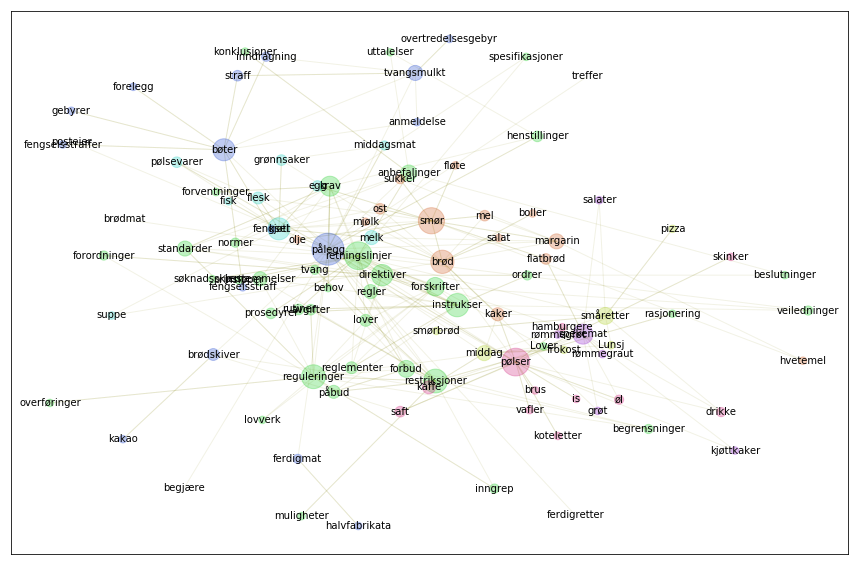

In [17]:
show_graph(G, spread=1.2)

Klikkstruktur for grafen

In [18]:
show_cliques(G)

(3, 1) melk, brød, kjøtt, pålegg, hvetemel, mel, flesk, pølser, smør, ost, sukker, egg, pølsevarer, margarin, kaker

(3, 2) standarder, forbud, rutiner, begrensninger, påbud, regler, reguleringer, pålegg, retningslinjer, anbefalinger, spesifikasjoner, restriksjoner, direktiver, prosedyrer, veiledninger, krav, normer, inngrep, lover, forskrifter, tvang, bestemmelser, instrukser, henstillinger, avgifter, reglementer, Lover, lovverk, ordrer

(3, 3) middag, pålegg, småretter, Lunsj, kaker

(3, 4) bøter, inndragning, tvangsmulkt, straff, anmeldelse, pålegg

(4, 1) melk, brød, pålegg, mel, smør, margarin

(4, 2) forbud, begrensninger, påbud, reguleringer, pålegg, restriksjoner

(4, 3) standarder, lover, forskrifter, pålegg, regler, bestemmelser, instrukser, reglementer, direktiver, retningslinjer, veiledninger

(5, 1) forskrifter, pålegg, instrukser, reglementer, direktiver, retningslinjer



Sammenlign med hierarkisk clustring som i gruppene under

In [21]:
show_community(G)

1 pizza, smørbrød, frokost, middag, småretter, Lunsj

2 forbud, rutiner, begrensninger, regler, reguleringer, søknadsskjema, muligheter, anbefalinger, restriksjoner, direktiver, prosedyrer, prinsipper, krav, overføringer, forventninger, inngrep, tvang, uttalelser, lover, konklusjoner, instrukser, henstillinger, Lover, lovverk, ordrer, standarder, påbud, forordninger, spesifikasjoner, behov, rasjonering, veiledninger, beslutninger, normer, forskrifter, bestemmelser, reglementer, avgifter, retningslinjer

3 suppe, melk, kjøtt, flesk, grønnsaker, egg, middagsmat, pølsevarer, fisk

4 fengselsstraffer, pålegg, begjære, kakao, posteier, fengselsstraff, straff, anmeldelse, ferdigmat, overtredelsesgebyr, brødmat, forelegg, halvfabrikata, gebyrer, brødskiver, inndragning, ferdigretter, fengsel, bøter, tvangsmulkt, treffer

5 rømmegraut, salater, grøt, spekemat, rømmegrøt, kjøttkaker

6 is, drikke, skinker, vafler, hamburgere, brus, pølser, saft, koteletter, kaffe, øl

7 brød, boller, mel, sukke

#### Lignende øvelse for _is_

In [22]:
G_is = nb.make_graph('is')

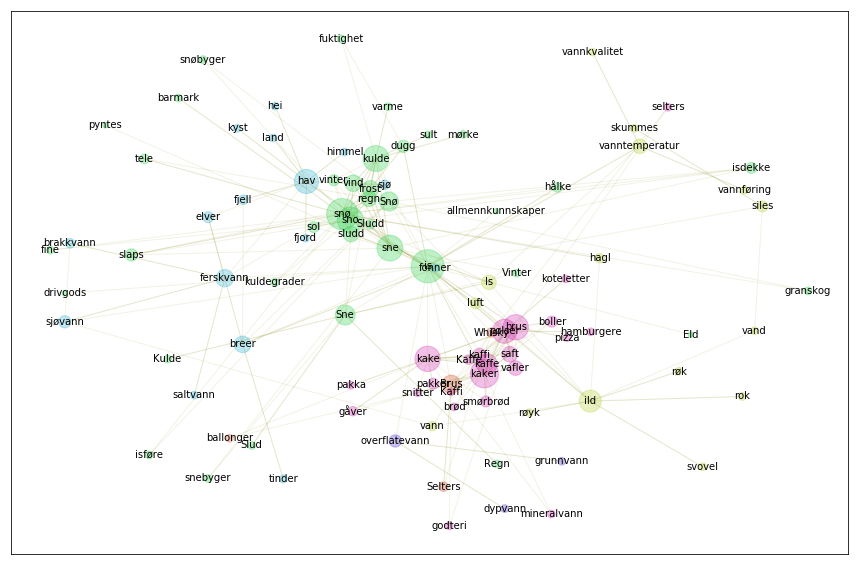

In [23]:
show_graph(G_is, spread=1.2)

In [24]:
show_cliques(G_is)

(3, 1) mineralvann, Brus, is, smørbrød, brød, vafler, boller, brus, kake, pølser, saft, Kaffe, kaffe, kaffi, kaker

(3, 2) Sne, is, vind, snø, regn, sludd, vinter, breer, frost, kuldegrader, fine, ild, Sludd, sno, hålke, slaps, isdekke, sol, kulde, sne, Snø

(3, 3) is, sjøvann, elver, hav, ferskvann, brakkvann, sjø

(4, 1) is, vind, sno, snø, regn, kulde, vinter, sne, frost

(4, 2) Brus, is, vafler, brus, pølser, kake, saft, kaffe, kaker

(5, 1) Brus, is, vafler, brus, pølser, kake, saft, kaffe, kaker



In [25]:
show_community(G_is)

1 skummes, ild, vannføring, luft, vann, vand, vannkvalitet, siles, vanntemperatur, Is, røyk, hagl, rok, svovel, røk

2 is, snøbyger, snø, snebyger, sult, regn, Kulde, Eld, sno, isdekke, Slud, pyntes, sol, sne, Vinter, Sne, vind, drivgods, barmark, fuktighet, isføre, allmennkunnskaper, Regn, tele, sludd, vinter, frost, kuldegrader, fine, Sludd, dugg, hålke, slaps, varme, mørke, kulde, Snø, granskog

3 land, fjell, fjord, saltvann, elver, fonner, brakkvann, himmel, kyst, tinder, hei, breer, ferskvann, hav, sjø, sjøvann

4 overflatevann, dypvann, grunnvann

5 mineralvann, smørbrød, gåver, godteri, pølser, koteletter, kaffi, kaker, kake, pakker, pizza, Kaffi, snitter, hamburgere, boller, saft, kaffe, pakka, selters, brød, vafler, brus, Kaffe

6 Selters, Whisky, Brus, ballonger



La oss se hvordan _is_ oppfører seg i Dewey klassifikasjon med 641, mat og drikke.

Først lager vi et korpus av 40 bøker fra 641

In [28]:
mat = nb.get_urn({'ddk':"641%", 'limit':40, 'lang':'nob'})
mat[:5]

[[2007073101082, 'Strand, Gunnar', 'Baking i byssa', 1969],
 [2012022208116, 'Engh, André', 'Kjøkken-ordbok', 1972],
 [2007052100024, 'Algreen, Elsa', 'Mat uten tårer', 1967],
 [2011030803009, 'Miller, Norma', 'Lekre retter fra middelhavslandene', 1990],
 [2010061403045,
  'Lodding, Sissel Keyn',
  'Fra bambusskudd til gurkemeie',
  1996]]

Så ser vi på en kollokasjonsgraf for _is_ i korpuset

In [29]:
I = nb.urn_coll('is', urns=mat, before=4, after=4)

Hvorpå vi lager en graf, og studere den

In [30]:
Ig = nx.Graph()
Ig.add_edges_from([('is', w) for w in I[:20].index])

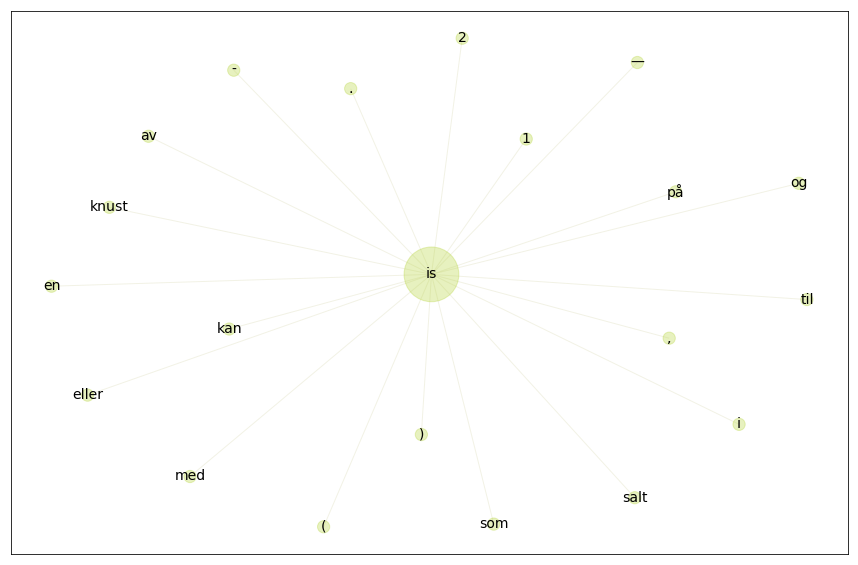

In [31]:
show_graph(Ig, fontsize=14, spread=0.03)

Her skal vi lage en fullstendig kollokasjon for _is_ ved at vi for hvert ord i kollokasjonen over lager en ny kollokasjon. Den slås sammen til en stor graf etterpå.

In [32]:
Ice = make_collocation_graph('is', urns=mat, top = 20, before=8, after=8, cutoff=0, cut_val=5)

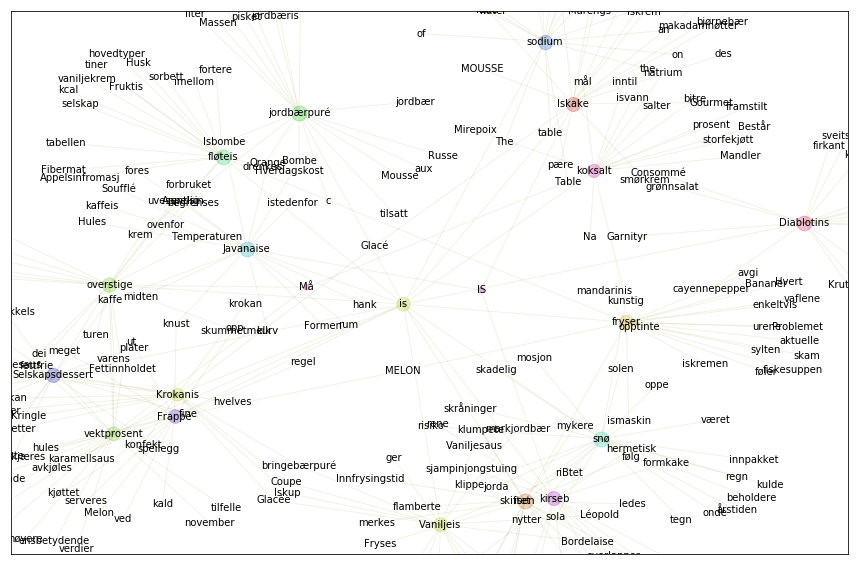

In [33]:
show_graph(Ice) # her med løvnoder

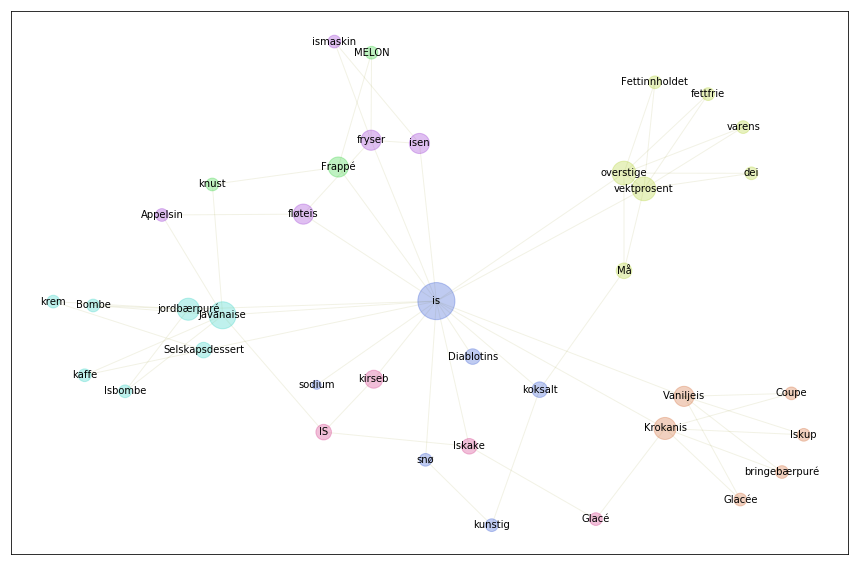

In [39]:
show_graph(cutdown(Ice)) # og uten løvnoder

Som vi ser av clustrene er det tydelig at det er spesialisert diskurs for is i mat og drikke (dewey 641), som handler om knust is, purréer og desserter.

In [40]:
show_community(cutdown(Ice))

1 Må, vektprosent, overstige, varens, fettfrie, Fettinnholdet, dei

2 knust, Frappé, MELON

3 Bombe, Isbombe, krem, jordbærpuré, Javanaise, kaffe, Selskapsdessert

4 is, sodium, koksalt, snø, Diablotins, kunstig

5 ismaskin, Appelsin, fløteis, isen, fryser

6 Glacé, Iskake, kirseb, IS

7 bringebærpuré, Iskup, Krokanis, Glacée, Vaniljeis, Coupe

